# Throughput

## Import Data

In [8]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns

sns.set(style="whitegrid")

In [9]:
data_frames = []

for file in glob.glob("*.orun.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        df = pdjson.json_normalize(data)
        df['variant'] = file.replace(".orun.bench","")
        data_frames.append(df)

df = pd.concat (data_frames, sort=False)
df = df.sort_values(['name']) 
# Uncomment the following to display all the lines in pandas output
pd.set_option('display.max_rows', df.shape[0]+1)
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.stats,gc.mean_space_overhead
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.916832,4.892395,0.024001,29760,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194470,8218,4,5790208,4.0,5790208,0.0,4.10.0+stock,NaN,NaN
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.090156,5.073757,0.016005,37996,66668.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,4194537,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore,false,3.494000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.605432,5.449048,0.156030,298116,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194548,65,1,2134022,NaN,2134022,NaN,4.10.0+multicore+256M,false,0.000000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,6.706578,5.686078,1.019655,2140796,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194460,8,1,5790208,4.0,5790208,0.0,4.10.0+stock+256M,NaN,NaN
6,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.422813,5.398401,0.024010,52356,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194552,1028,2,3182601,NaN,3182601,NaN,4.10.0+multicore+2M,false,3.492026
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.081199,5.056799,0.024003,37992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore+default,false,3.491928
13,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.133002,5.128602,0.004000,36992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,16433,2,3182601,NaN,3182601,NaN,4.10.0+multicore+128k,false,3.491928
36,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.337446,1.583458,0.753167,1413236,2449386.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,6564465,2,0,6972416,23.0,6972416,0.0,4.10.0+stock+256M,NaN,NaN
36,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,2.466049,2.117451,0.348238,716528,2822317.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,55529798,8,3,40382193,NaN,40382193,NaN,4.10.0+multicore+256M,false,3.504781
49,alt-ergo.fill.why,taskset --cpu-list 5 alt-ergo benchmarks/alt-e...,3.038664,2.794552,0.243800,430100,2822317.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,60800918,653,17,46729195,NaN,46729195,NaN,4.10.0+multicore+default,false,5.676351


### Drop some benchmarks


In [10]:
df = df[(df.name != 'alt-ergo.fill.why') &         #multicore version does not exist
        (df.name != 'alt-ergo.yyll.why') &         #multicore version does not exist
        (df.name != 'frama-c.slevel') &            #multicore version does not exist
        (df.name != 'js_of_ocaml.frama-c_byte')]   #multicore version does not exist
df = df[(df.variant != '4.10.0+multicore+2M') & 
        (df.variant != '4.10+multicore+128k')]   #dropping 128k and 2M, less noise.
throughput_df = df
df

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.stats,gc.mean_space_overhead
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.916832,4.892395,0.024001,29760,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194470,8218,4,5790208,4.0,5790208,0.0,4.10.0+stock,NaN,NaN
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.090156,5.073757,0.016005,37996,66668.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,4194537,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore,false,3.494000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.605432,5.449048,0.156030,298116,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194548,65,1,2134022,NaN,2134022,NaN,4.10.0+multicore+256M,false,0.000000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,6.706578,5.686078,1.019655,2140796,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194460,8,1,5790208,4.0,5790208,0.0,4.10.0+stock+256M,NaN,NaN
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.081199,5.056799,0.024003,37992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore+default,false,3.491928
13,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.133002,5.128602,0.004000,36992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,16433,2,3182601,NaN,3182601,NaN,4.10.0+multicore+128k,false,3.491928
13,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,6.353610,6.337239,0.015993,22340,161022.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,2484139,4694,9,1965721,NaN,1965721,NaN,4.10.0+multicore,false,15.617536
13,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,6.676595,6.672214,0.004000,22180,161020.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,2484160,4695,10,1707670,NaN,1773209,NaN,4.10.0+multicore+default,false,21.821773
11,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,7.497004,6.480054,1.016008,2130692,136950.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,1691218,5,1,1779200,13.0,1779200,0.0,4.10.0+stock+256M,NaN,NaN
11,bdd.26,taskset --cpu-list 5 ./bdd.exe 26,6.452784,6.324358,0.128007,279912,161020.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,1691305,39,3,1314457,NaN,1314457,NaN,4.10.0+multicore+256M,false,13.712765


### Selection example

```
select * from df where variant = '4.10.0+trunk' and time_secs > 10
```

In [11]:
df.loc[(df['variant'] == '4.10.0+multicore+default') & (df['time_secs'] > 10)]

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.stats,gc.mean_space_overhead
45,binarytrees5.21,taskset --cpu-list 5 ./binarytrees5.exe 21,15.231430,15.175085,0.055996,146976,275505.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,280583725,3565,69,17616896,NaN,18083840,NaN,4.10.0+multicore+default,false,38.695093
39,coq.AbstractInterpretation.v,taskset --cpu-list 5 coqc benchmarks/coq/Abstr...,388.799596,388.257275,0.539996,1174952,5869690.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,974733470,272371,78,66410385,NaN,118336146,NaN,4.10.0+multicore+default,false,44.385999
18,coq.BasicSyntax.v,taskset --cpu-list 5 coqc benchmarks/coq/Basic...,134.125204,133.787588,0.335998,690380,5869690.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,341521679,90208,42,54802455,NaN,56553691,NaN,4.10.0+multicore+default,false,37.585856
26,cpdf.scale,taskset --cpu-list 5 cpdf scale-to-fit a4lands...,17.006255,16.761711,0.244024,293628,1131464.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,95777564,2285,27,33069119,NaN,33258995,NaN,4.10.0+multicore+default,false,27.535382
1,cpdf.squeeze,taskset --cpu-list 5 cpdf -squeeze benchmarks/...,19.798795,19.494292,0.303973,384180,1131464.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,140129306,1655,32,28928115,NaN,47454916,NaN,4.10.0+multicore+default,false,32.708931
51,cubicle.german_pfs.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,333.707136,333.134996,0.567988,417956,1216325.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,3520295366,77214,458,33891124,NaN,57795365,NaN,4.10.0+multicore+default,false,113.470050
52,cubicle.szymanski_at.cub,taskset --cpu-list 5 cubicle benchmarks/cubicl...,679.627927,679.403367,0.219998,189828,1216325.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,6432904503,406208,1475,16913036,NaN,27399901,NaN,4.10.0+multicore+default,false,86.572674
0,evolutionary_algorithm.10000_10000,taskset --cpu-list 5 ./evolutionary_algorithm....,84.207961,82.343136,1.863980,3334964,167227.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,1300975458,14259,30,395978539,NaN,426167593,NaN,4.10.0+multicore+default,false,14.026545
20,fannkuchredux.12,taskset --cpu-list 5 ./fannkuchredux.exe 12,96.902280,96.901789,0.000000,5460,275598.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,94,0,0,8192,NaN,8192,NaN,4.10.0+multicore+default,false,0.000000
50,fannkuchredux2.12,taskset --cpu-list 5 ./fannkuchredux2.exe 12,99.233727,99.233228,0.000000,5596,275875.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,94,0,0,8192,NaN,8192,NaN,4.10.0+multicore+default,false,0.000000


In [12]:
df.loc[df['name'] == 'LU_decomposition.1024']

,name,command,time_secs,user_time_secs,sys_time_secs,maxrss_kB,codesize,ocaml_url,ocaml.version,ocaml.c_compiler,...,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions,variant,ocaml.stats,gc.mean_space_overhead
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,4.916832,4.892395,0.024001,29760,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194470,8218,4,5790208,4.0,5790208,0.0,4.10.0+stock,NaN,NaN
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.090156,5.073757,0.016005,37996,66668.0,https://github.com/ocaml-multicore/ocaml-multi...,4.10.0+multicore,gcc,...,4194537,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore,false,3.494000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.605432,5.449048,0.156030,298116,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194548,65,1,2134022,NaN,2134022,NaN,4.10.0+multicore+256M,false,0.000000
10,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,6.706578,5.686078,1.019655,2140796,51658.0,https://github.com/ocaml/ocaml/archive/4.10.0....,4.10.0,gcc,...,4194460,8,1,5790208,4.0,5790208,0.0,4.10.0+stock+256M,NaN,NaN
32,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.081199,5.056799,0.024003,37992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,8217,2,3182601,NaN,3182601,NaN,4.10.0+multicore+default,false,3.491928
13,LU_decomposition.1024,taskset --cpu-list 5 ./LU_decomposition.exe 1024,5.133002,5.128602,0.004000,36992,66666.0,https://github.com/Engil/ocaml-multicore/archi...,4.10.0+multicore,gcc,...,4194558,16433,2,3182601,NaN,3182601,NaN,4.10.0+multicore+128k,false,3.491928


### Projection example

```
select name, variant, time_secs from df
```

In [13]:
df.filter(['name','variant','time_secs'])4.10.0+multicore+256M.

,name,variant,time_secs
32,LU_decomposition.1024,4.10.0+stock,4.916832
32,LU_decomposition.1024,4.10.0+multicore,5.090156
10,LU_decomposition.1024,4.10.0+multicore+256M,5.605432
10,LU_decomposition.1024,4.10.0+stock+256M,6.706578
32,LU_decomposition.1024,4.10.0+multicore+default,5.081199
13,LU_decomposition.1024,4.10.0+multicore+128k,5.133002
13,bdd.26,4.10.0+multicore,6.353610
13,bdd.26,4.10.0+multicore+default,6.676595
11,bdd.26,4.10.0+stock+256M,7.497004
11,bdd.26,4.10.0+multicore+256M,6.452784


## Time

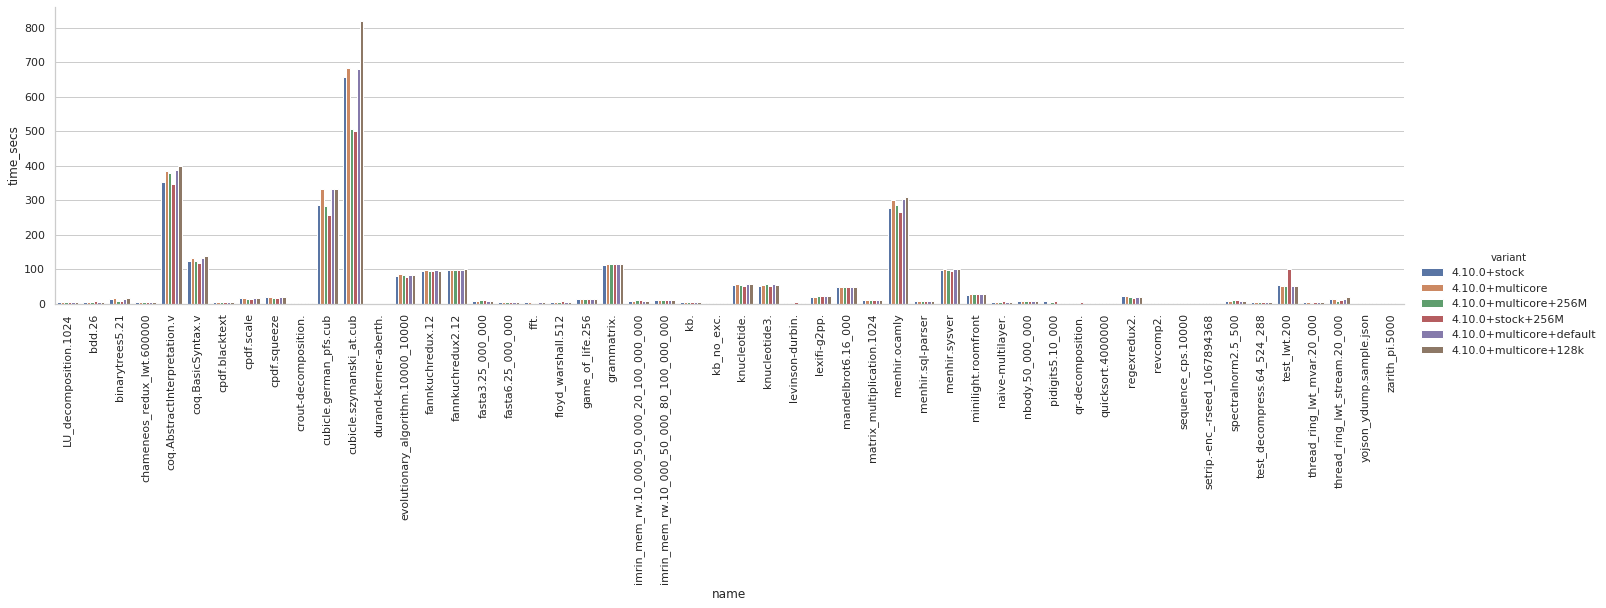

In [14]:
g = sns.catplot (x='name', y='time_secs', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

In [15]:
# returns a dictionary with {key = name : value : metric}
# the metric corresponds to the variant
def create_column(df, variant, metric):
    df = pd.DataFrame.copy(df)
    variant_metric_name = list([ zip(df[metric], df[x], df['name']) 
              for x in df.columns.array if x == "variant" ][0])
    name_metric = {n:t for (t, v, n) in variant_metric_name if v == variant}
#     print(name_metric)
    return name_metric

def add_display_name(df,variant, metric):
    name_metric = create_column(pd.DataFrame.copy(df), variant, metric)
#     print(name_metric)
    disp_name = [name+" ("+str(round(name_metric[name], 2))+")" for name in df["name"]]
    df["display_name"] = pd.Series(disp_name, index=df.index)
    return df

def normalise(df,variant,topic,additionalTopics=[]):
    df = add_display_name(df,variant,topic)
    df = df.sort_values(["name","variant"])
    grouped = df.filter(items=['name',topic,'variant','display_name']+additionalTopics).groupby('variant')
    ndata_frames = []
    for group in grouped:
        (v,data) = group
        if(v != variant):
            data['b'+topic] = grouped.get_group(variant)[topic].values
            data[['n'+topic]] = data[[topic]].div(grouped.get_group(variant)[topic].values, axis=0)
            for t in additionalTopics:
#                 print(variant, t)
                data[[t]] = grouped.get_group(variant)[t].values
            ndata_frames.append(data)
    df = pd.concat (ndata_frames)
    return df

def plot_normalised(df,variant,topic):
    df = pd.DataFrame.copy(df)
    df.sort_values(by=[topic],inplace=True)
    df[topic] = df[topic] - 1
    g = sns.catplot (x="display_name", y=topic, hue='variant', data = df, kind ='bar', aspect=4, bottom=1)
    g.set_xticklabels(rotation=90)
    g.ax.legend(loc=8)
    g._legend.remove()
    g.ax.set_xlabel("Benchmarks")
    return g
    # g.ax.set_yscale('log')

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values
/usr/lib/python3/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


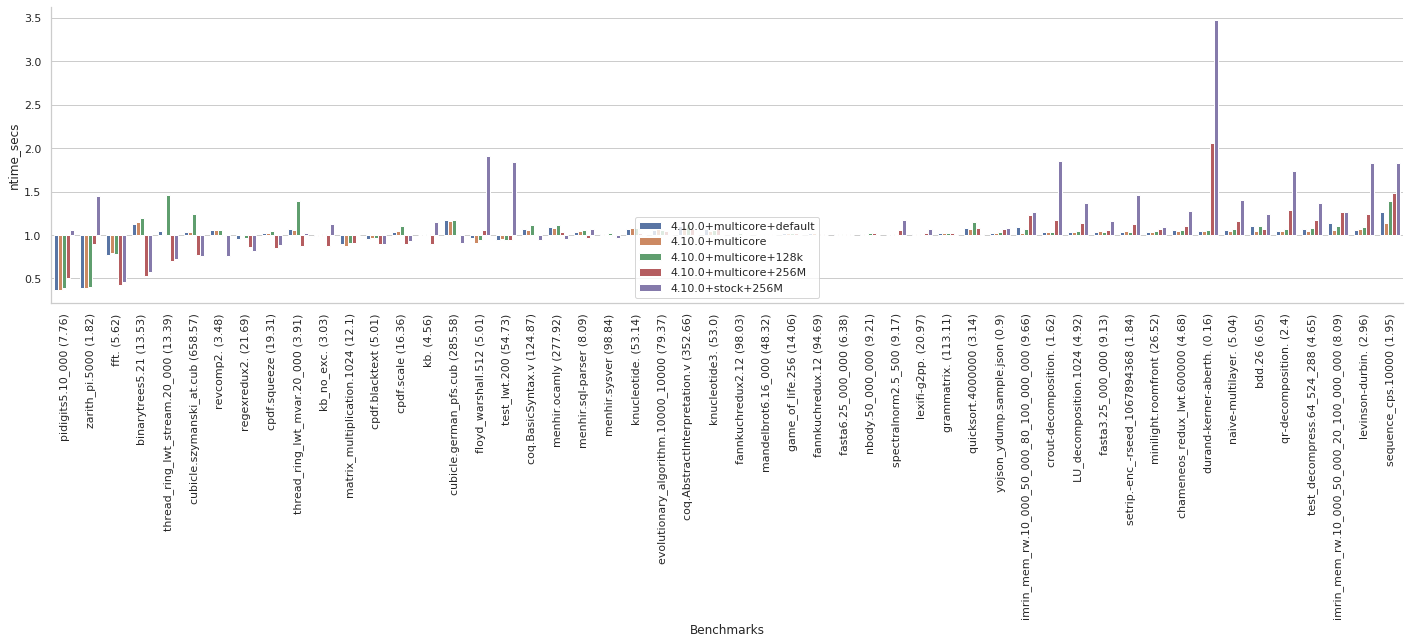

In [16]:
ndf = normalise(df,'4.10.0+stock','time_secs')
plot_normalised(ndf,'4.10.0+stock','ntime_secs')

## Top heap words

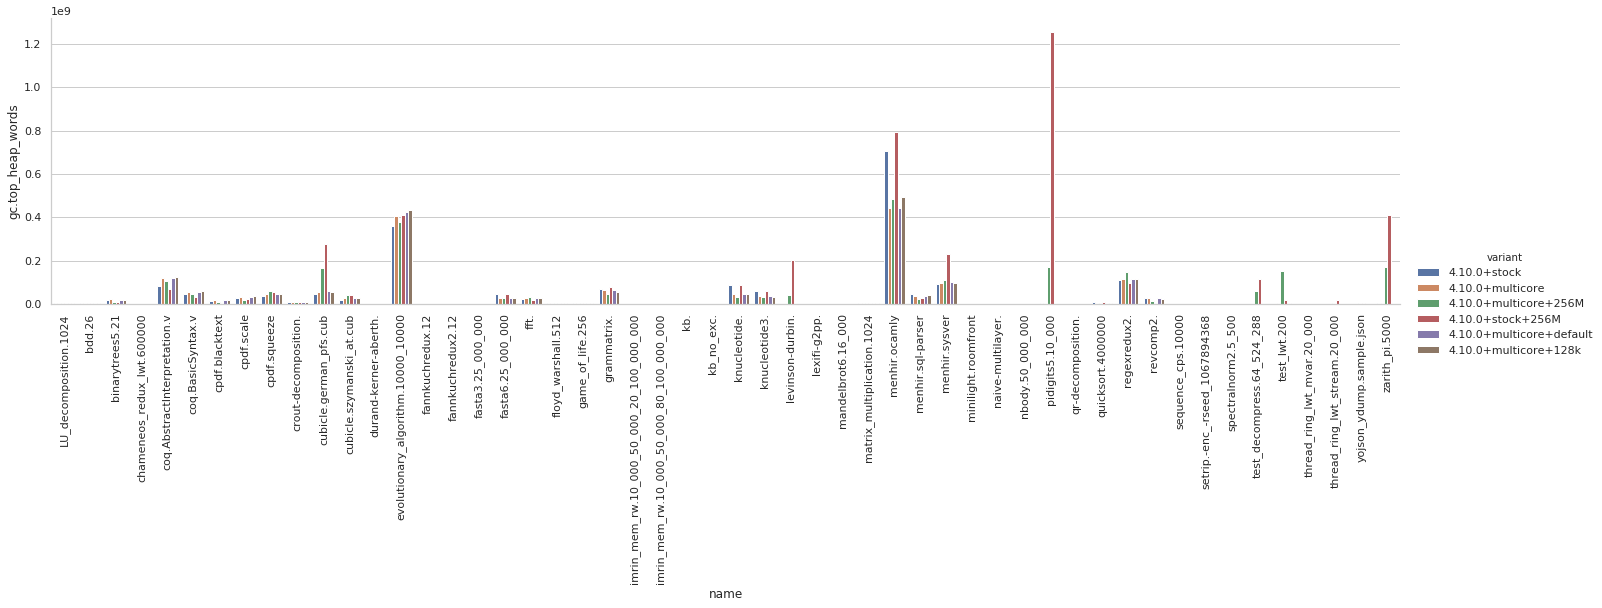

In [17]:
g = sns.catplot (x='name', y='gc.top_heap_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


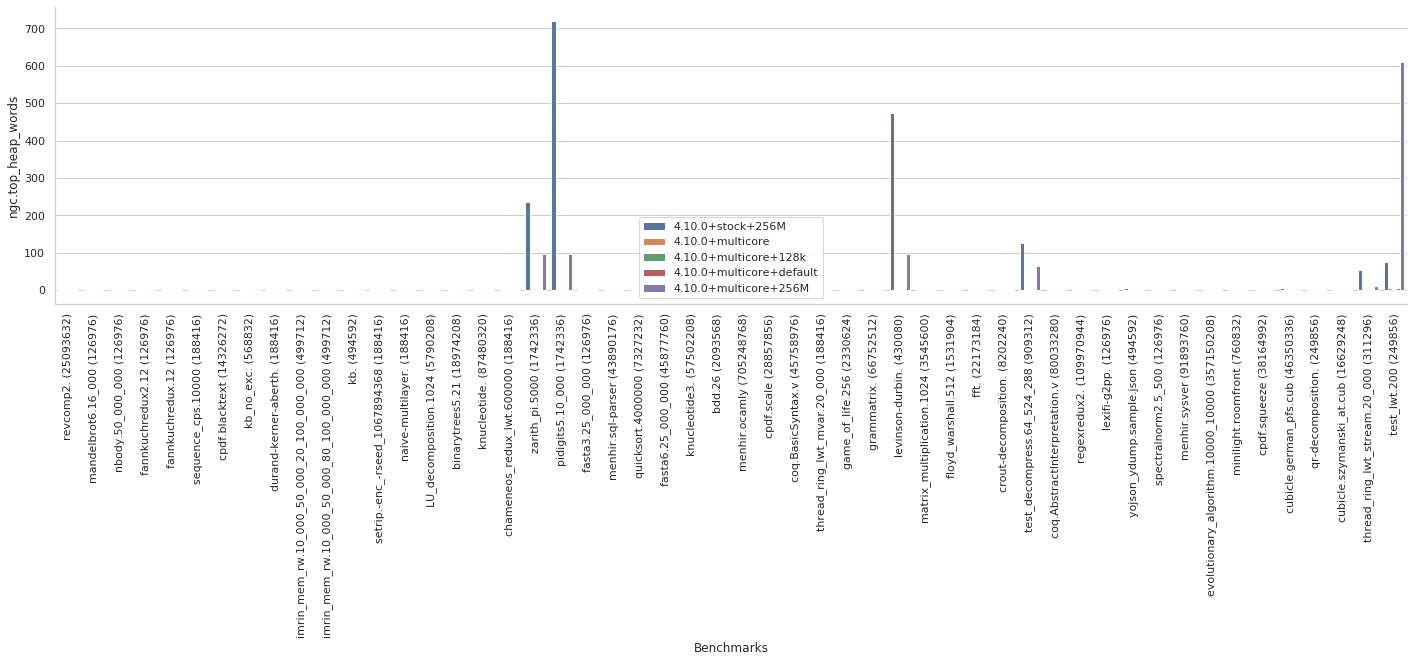

In [18]:
ndf = normalise(df,'4.10.0+stock','gc.top_heap_words')
plot_normalised(ndf,'4.10.0+stock','ngc.top_heap_words')

## Max RSS (KB)

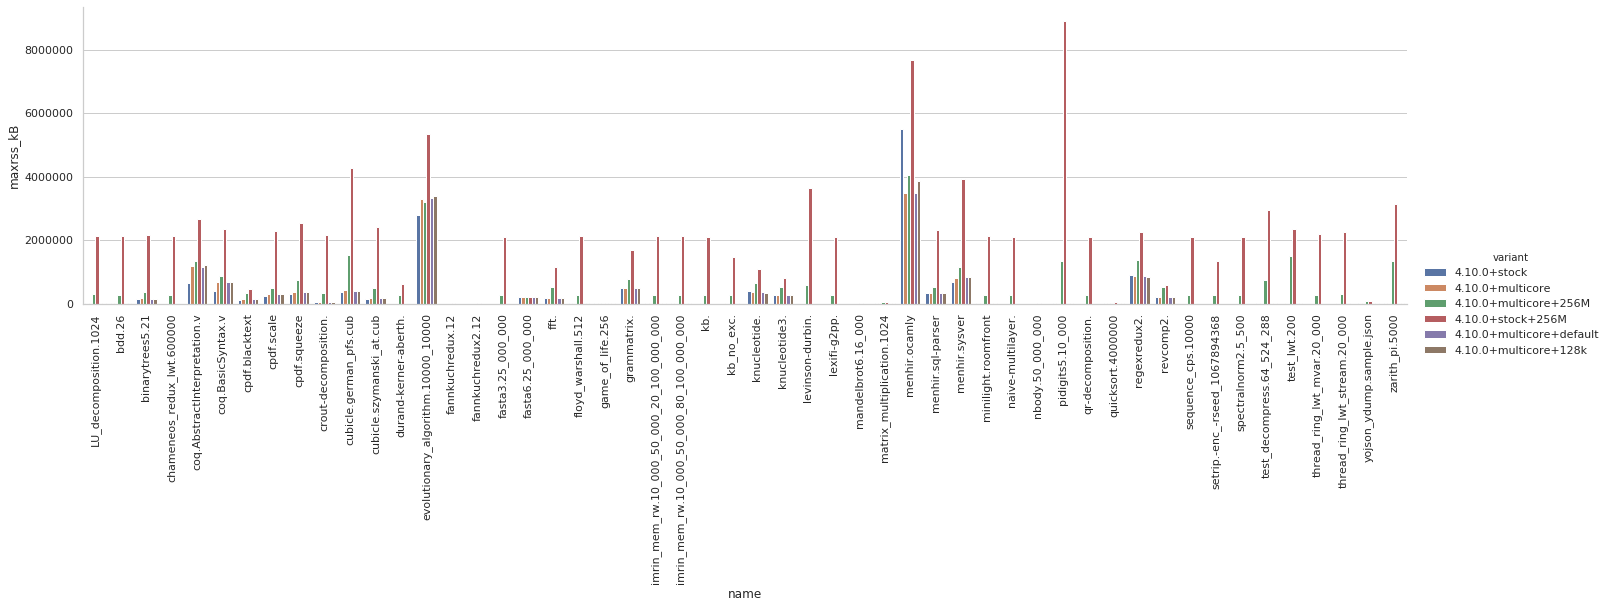

In [19]:
g = sns.catplot (x='name', y='maxrss_kB', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


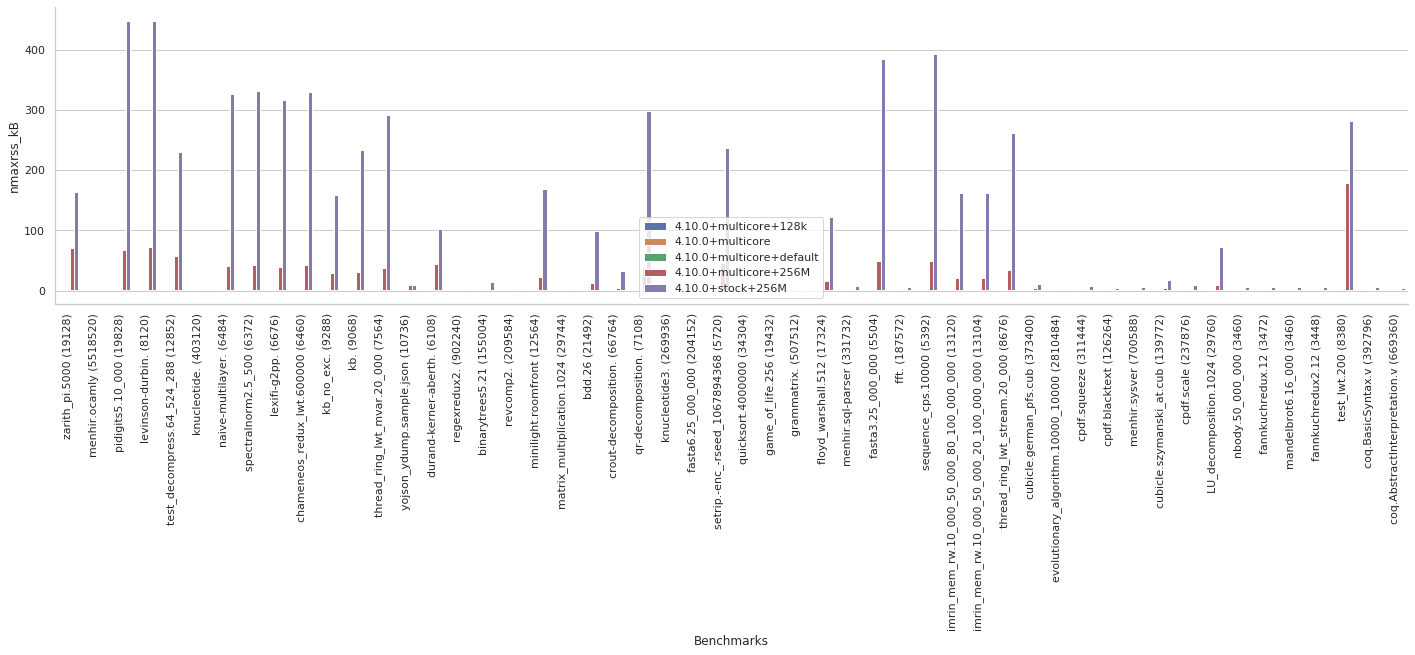

In [20]:
ndf = normalise(df,'4.10.0+stock','maxrss_kB')
plot_normalised(ndf,'4.10.0+stock','nmaxrss_kB')

## Major Collections

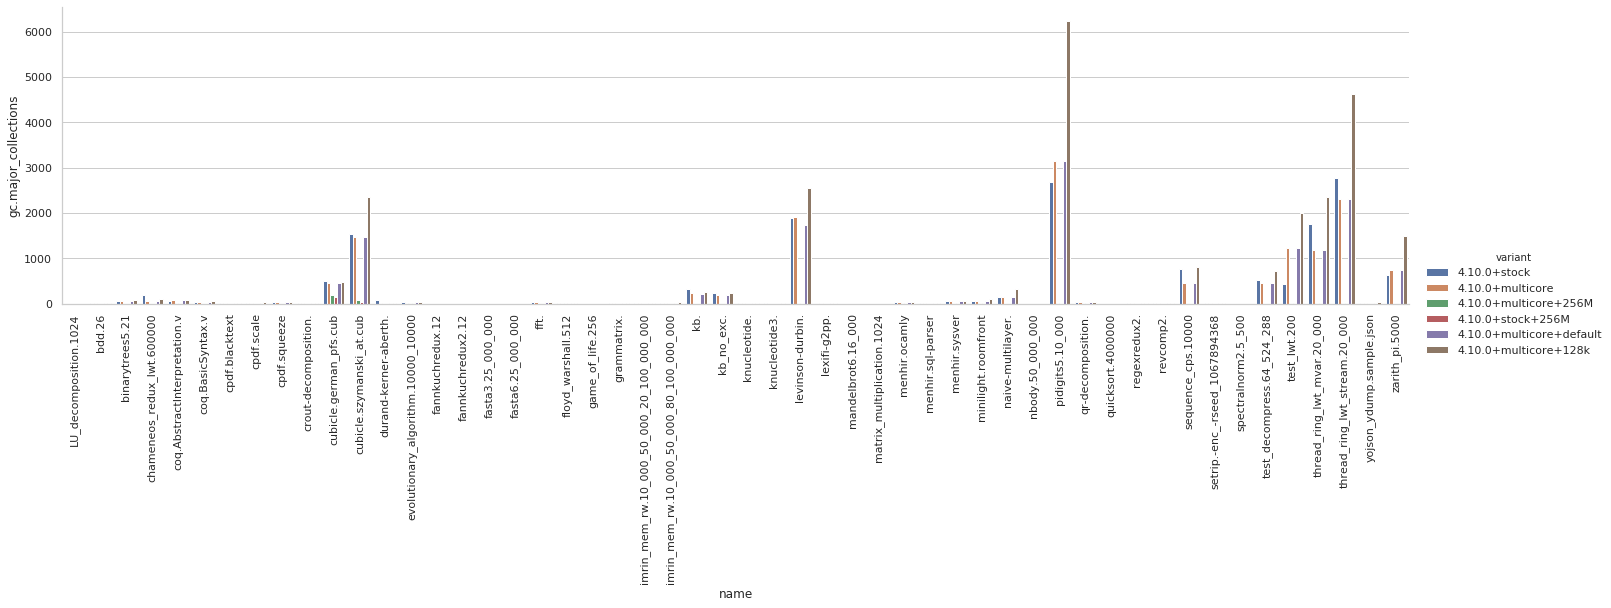

In [21]:
g = sns.catplot (x='name', y='gc.major_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


,name,gc.major_collections,variant,display_name,bgc.major_collections,ngc.major_collections
32,LU_decomposition.1024,2,4.10.0+multicore,LU_decomposition.1024 (4),4,0.500000
13,bdd.26,9,4.10.0+multicore,bdd.26 (11),11,0.818182
45,binarytrees5.21,68,4.10.0+multicore,binarytrees5.21 (63),63,1.079365
4,chameneos_redux_lwt.600000,62,4.10.0+multicore,chameneos_redux_lwt.600000 (202),202,0.306931
39,coq.AbstractInterpretation.v,78,4.10.0+multicore,coq.AbstractInterpretation.v (68),68,1.147059
18,coq.BasicSyntax.v,42,4.10.0+multicore,coq.BasicSyntax.v (41),41,1.024390
16,cpdf.blacktext,13,4.10.0+multicore,cpdf.blacktext (15),15,0.866667
26,cpdf.scale,27,4.10.0+multicore,cpdf.scale (29),29,0.931034
1,cpdf.squeeze,32,4.10.0+multicore,cpdf.squeeze (34),34,0.941176
11,crout-decomposition.,7,4.10.0+multicore,crout-decomposition. (10),10,0.700000


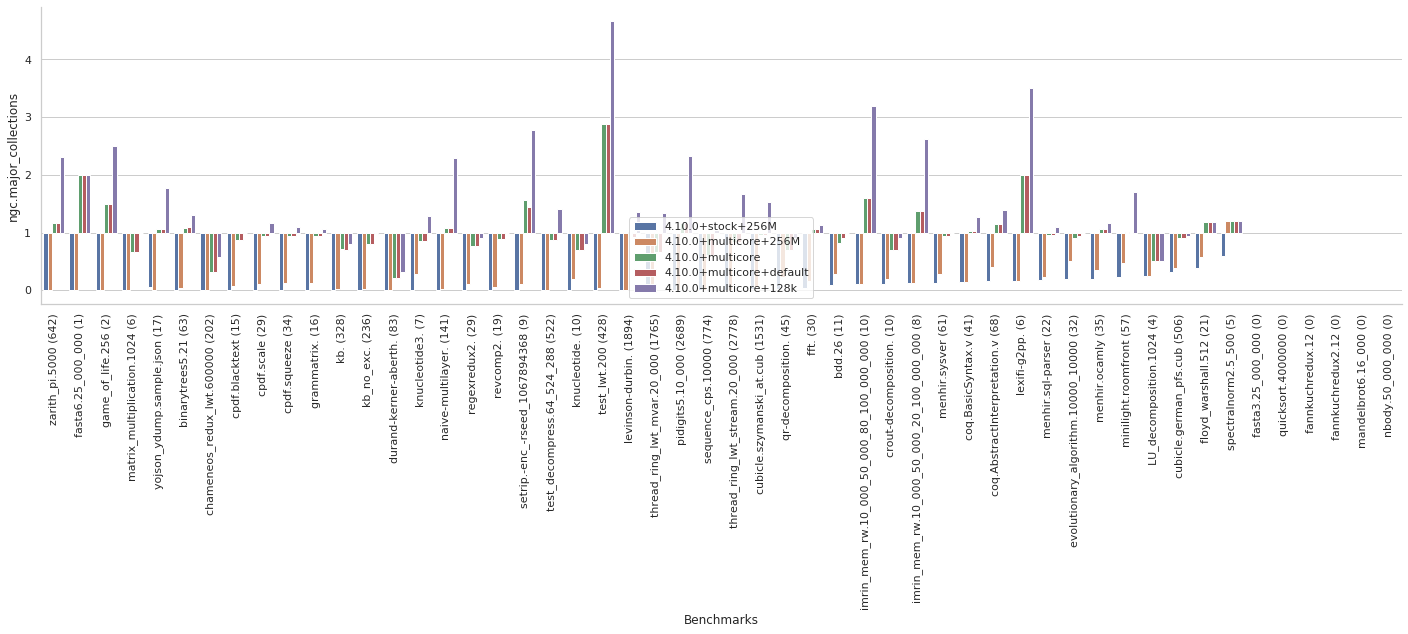

In [23]:
ndf = normalise(df,'4.10.0+stock','gc.major_collections')
plot_normalised(ndf,'4.10.0+stock','ngc.major_collections')
ndf

## Major words

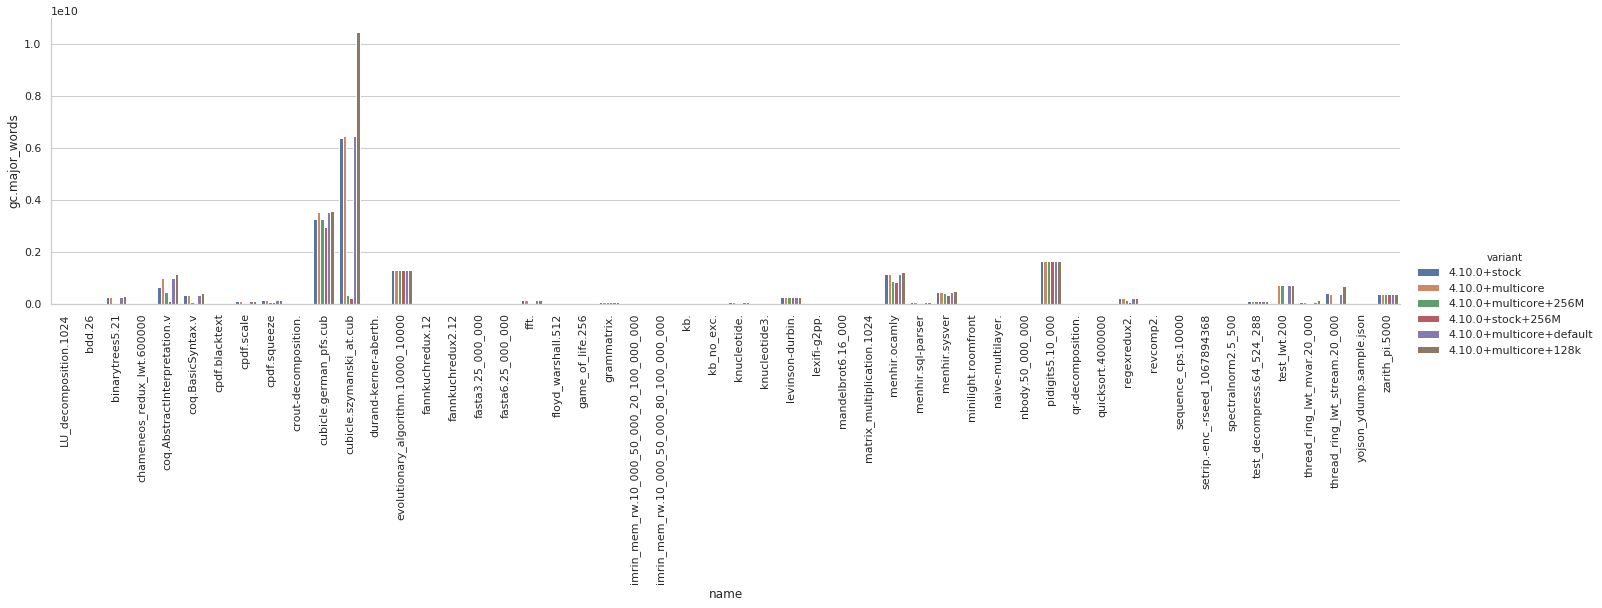

In [24]:
g = sns.catplot (x='name', y='gc.major_words', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


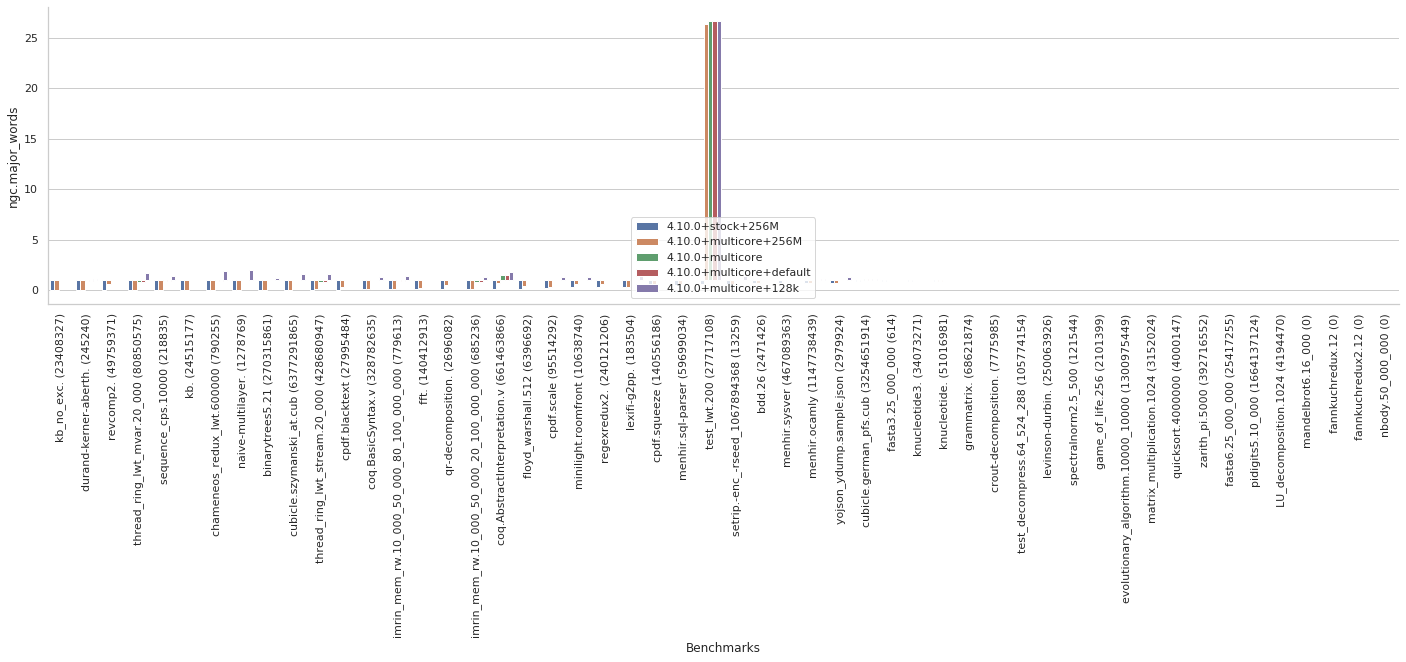

In [27]:
ndf = normalise(df,'4.10.0+stock','gc.major_words')
plot_normalised(ndf,'4.10.0+stock','ngc.major_words')

## Minor Collections

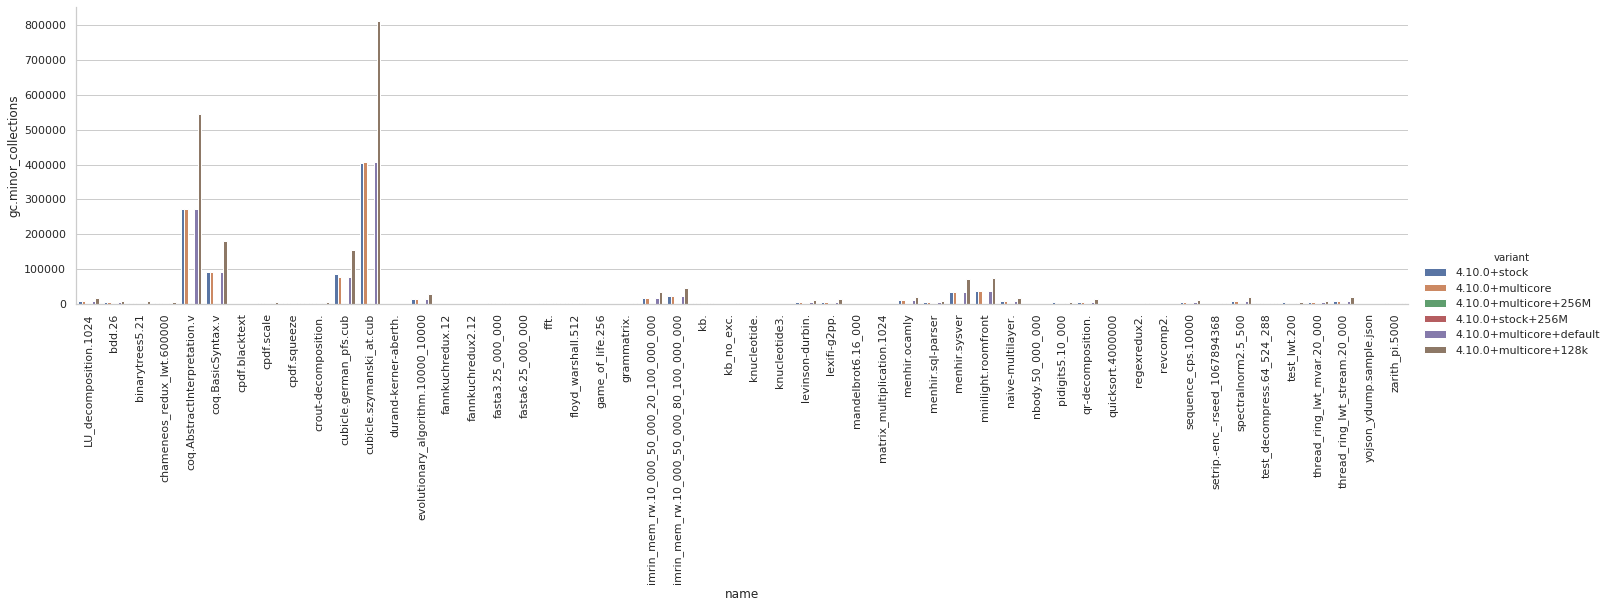

In [28]:
g = sns.catplot (x='name', y='gc.minor_collections', hue='variant', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

<ipython-input-15-890d57e0b3eb>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['b'+topic] = grouped.get_group(variant)[topic].values


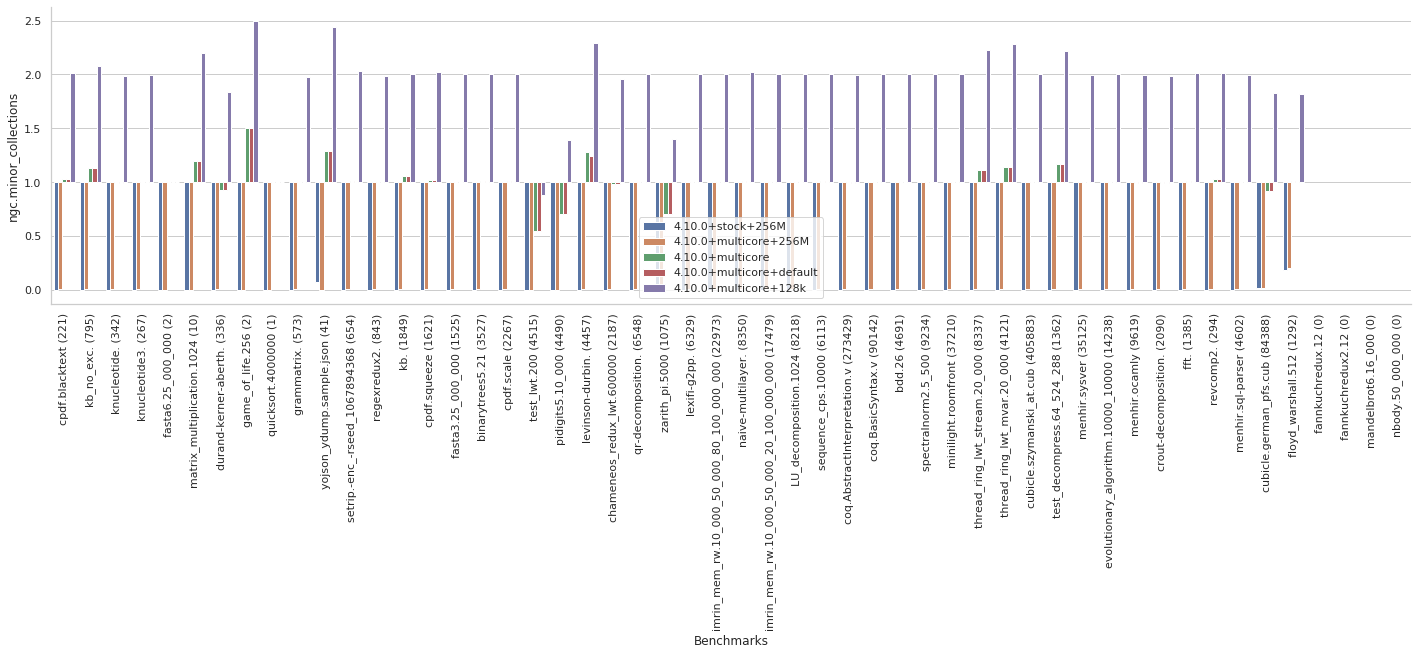

In [31]:
ndf = normalise(df,'4.10.0+stock','gc.minor_collections')
plot_normalised(ndf,'4.10.0+stock','ngc.minor_collections')

# Latency

In [32]:
data_frames = []

for file in glob.glob("*.pausetimes_*.bench"):
    with open(file) as f:
        data = []
        for l in f:
            data.append(json.loads(l))
        ldf = pdjson.json_normalize(data)
        ldf['variant'] = file.replace(".pausetimes_multicore.bench","").replace(".pausetimes_trunk.bench","")
        data_frames.append(ldf)

df2 = pd.concat(data_frames, sort=False)
df2 = df2.sort_values(['name'])

## Drop some benchmarks
df2 = df2[(df2.name != 'alt-ergo.fill.why') & #multicore version does not exist
        (df2.name != 'alt-ergo.yyll.why') & #multicore version does not exist
        (df2.name != 'frama-c.slevel') &    #multicore version does not exist
        (df2.name != 'js_of_ocaml.frama-c_byte') &    #multicore version does not exist
        (df2.name != 'cpdf.merge')]         #Not a macro benchmark. Will be removed from subsequent runs.
df2 = df2[(df2.variant != '4.10.0+multicore+2M') & 
        (df2.variant != '4.10+multicore+128k')]   #dropping 128k and 2M, less noise.
df2.count()
latency_df = df2
df2

,name,mean_latency,max_latency,distr_latency,variant
7,LU_decomposition.1024,3.428798e+04,276335,"[9083, 9084, 9166, 9167, 26417, 94209, 94376, ...",4.10.0+multicore+pausetimes+128k
29,LU_decomposition.1024,3.413036e+04,277126,"[9083, 9125, 9166, 9167, 26417, 94084, 94250, ...",4.10.0+multicore+pausetimes+default
26,LU_decomposition.1024,4.182569e+04,109376,"[19500, 19584, 24000, 26000, 28792, 30417, 357...",4.10.0+stock+instrumented.pausetimes_trunk_256...
6,LU_decomposition.1024,3.418943e+04,277876,"[9083, 9125, 9166, 9167, 26375, 94084, 94251, ...",4.10.0+multicore+pausetimes+256M
41,LU_decomposition.1024,3.414786e+04,278668,"[9083, 9084, 9166, 9167, 26250, 94083, 94209, ...",4.10.0+multicore+pausetimes+2M
43,LU_decomposition.1024,2.398033e+04,240542,"[18417, 18500, 18583, 21292, 25750, 27708, 277...",4.10.0+stock+instrumented
29,LU_decomposition.1024,3.497361e+04,303877,"[9083, 9084, 9166, 9167, 26542, 100417, 100542...",4.10.0+multicore
16,bdd.26,3.996817e+04,8742498,"[9083, 9125, 9167, 9167, 86584, 89625, 95167, ...",4.10.0+multicore+pausetimes+default
1,bdd.26,4.776426e+06,13956235,"[116293, 283418, 545586, 1360715, 4971066, 497...",4.10.0+stock+instrumented.pausetimes_trunk_256...
51,bdd.26,3.963385e+04,8830833,"[9084, 9166, 9167, 9250, 86584, 89583, 95125, ...",4.10.0+multicore+pausetimes+2M


The latency distributions `distr_latency` are a list of latencies at `[10,20,30,40,50,60,70,80,90,95,99,99.9]`th percentiles.

## Max latency

In [33]:
df2.filter(["name","variant","max_latency"])

,name,variant,max_latency
7,LU_decomposition.1024,4.10.0+multicore+pausetimes+128k,276335
29,LU_decomposition.1024,4.10.0+multicore+pausetimes+default,277126
26,LU_decomposition.1024,4.10.0+stock+instrumented.pausetimes_trunk_256...,109376
6,LU_decomposition.1024,4.10.0+multicore+pausetimes+256M,277876
41,LU_decomposition.1024,4.10.0+multicore+pausetimes+2M,278668
43,LU_decomposition.1024,4.10.0+stock+instrumented,240542
29,LU_decomposition.1024,4.10.0+multicore,303877
16,bdd.26,4.10.0+multicore+pausetimes+default,8742498
1,bdd.26,4.10.0+stock+instrumented.pausetimes_trunk_256...,13956235
51,bdd.26,4.10.0+multicore+pausetimes+2M,8830833


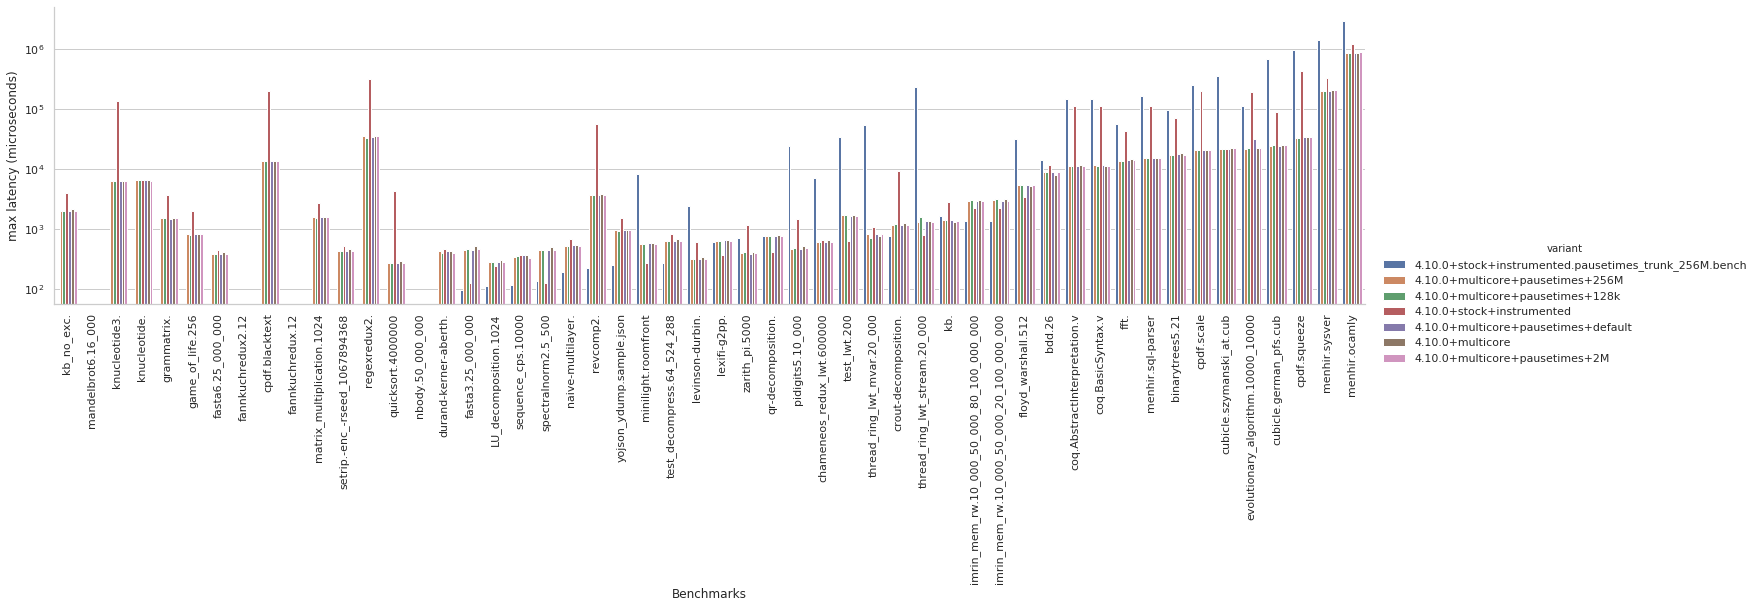

In [34]:
def plotLatencyAt(df,at,aspect):
    fdf = df.filter(["name","variant",at + "_latency"])
    fdf.sort_values(by=[at + '_latency'],inplace=True)
    fdf[at + "_latency"] = fdf[at + "_latency"] / 1000.0
    g = sns.catplot (x='name', y=at+'_latency', hue='variant', data = fdf, kind ='bar', aspect=aspect)
    g.set_xticklabels(rotation=90)
    g.ax.set_ylabel(at + " latency (microseconds)")
    g.ax.set_xlabel("Benchmarks")
    g.ax.set_yscale('log')
    return g

plotLatencyAt(df2,"max",4)

## 99.9th percentile latency

/usr/lib/python3/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


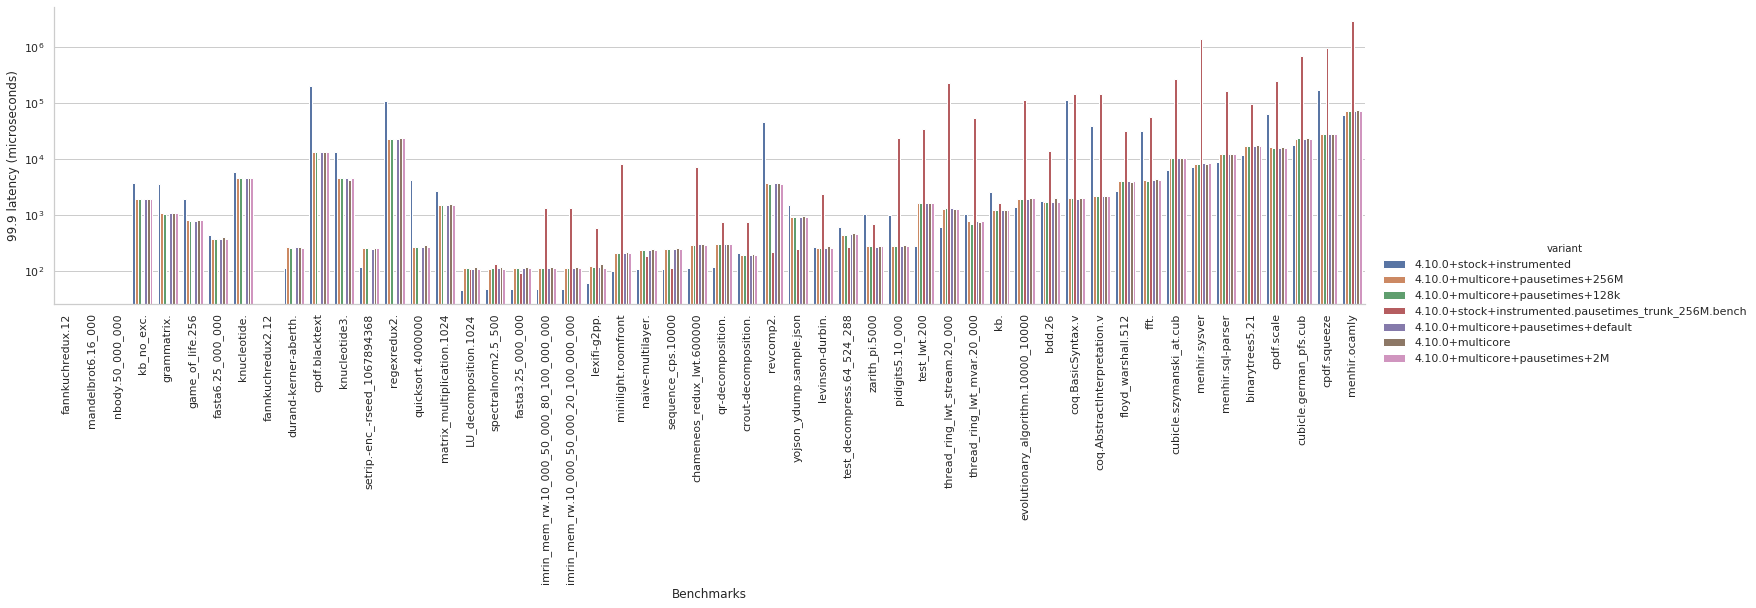

In [35]:
def getLatencyAt(df,percentile,idx):
    groups = df.groupby('variant')
    ndfs = []
    for group in groups:
        (v,df) = group
        for i, row in df.iterrows():
            df.at[i,percentile+"_latency"] = list(df.at[i,"distr_latency"])[idx]
        ndfs.append(df)
    return pd.concat(ndfs)

df2 = getLatencyAt(df2,"99.9",-1)
plotLatencyAt(df2,"99.9",4)

## 99th percentile latency

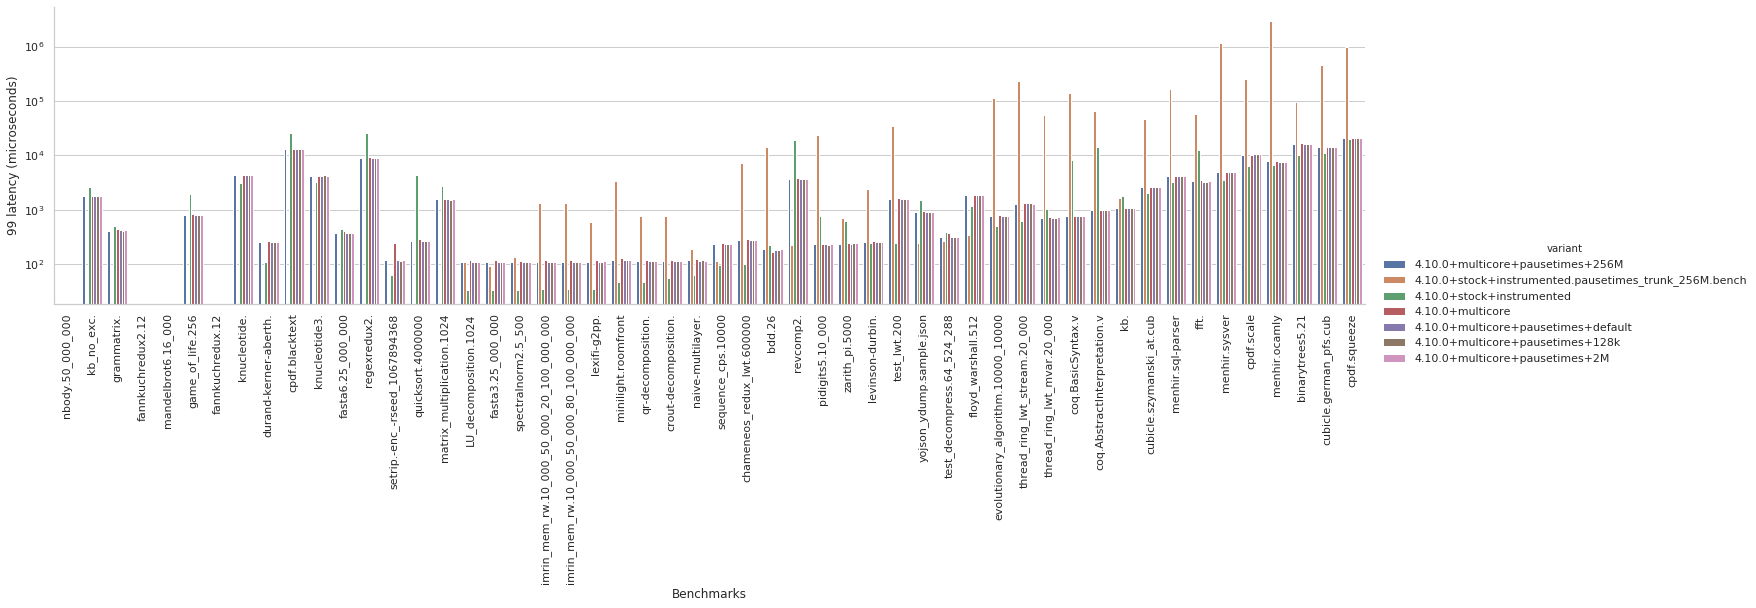

In [36]:
df2 = getLatencyAt(df2,"99",-2)
plotLatencyAt(df2,"99",4)